First few rows of the dataset:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price   

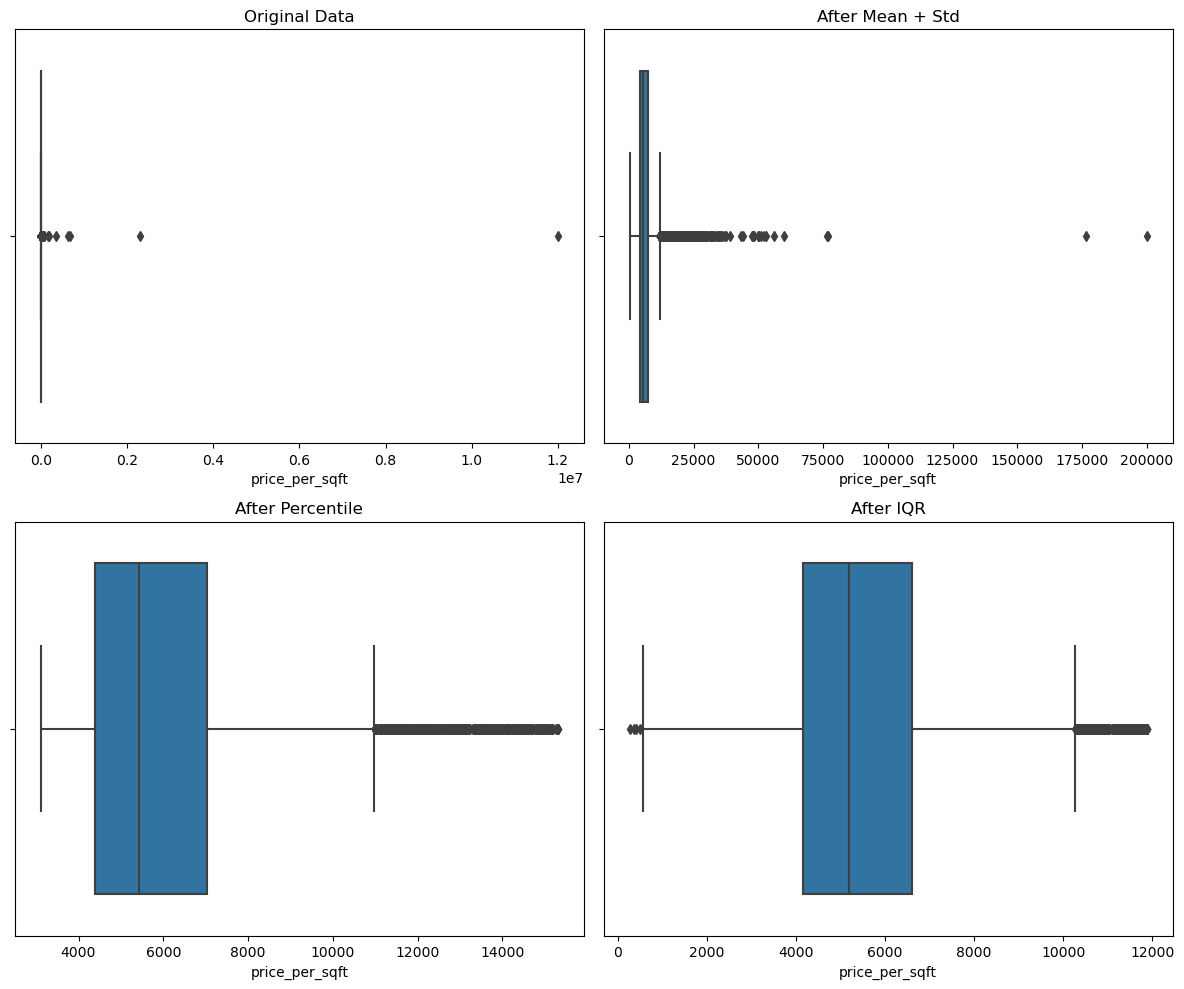

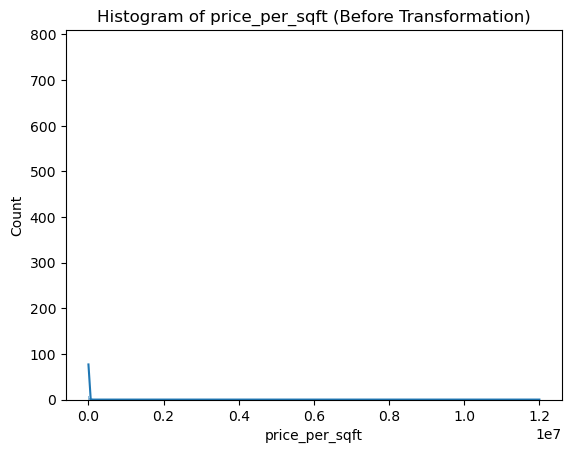

Skewness before transformation: 108.28105529705168
Kurtosis before transformation: 12095.21502832288


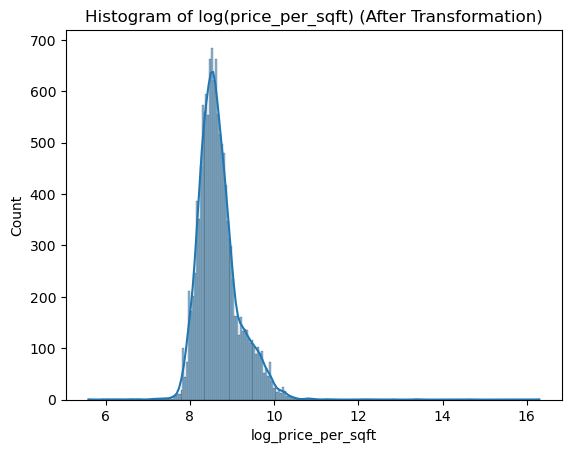

Skewness after transformation: 1.4004850530059278
Kurtosis after transformation: 9.206942162860816


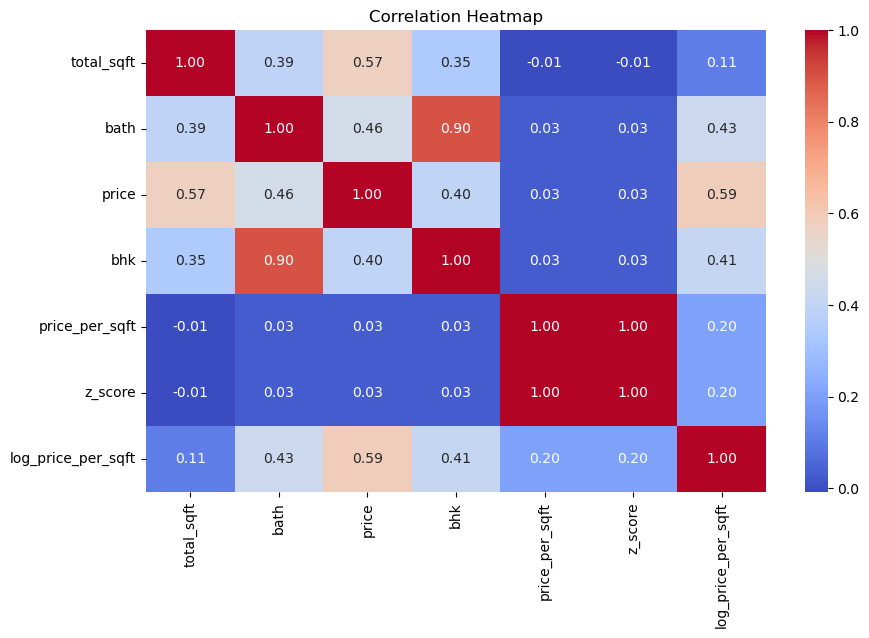

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


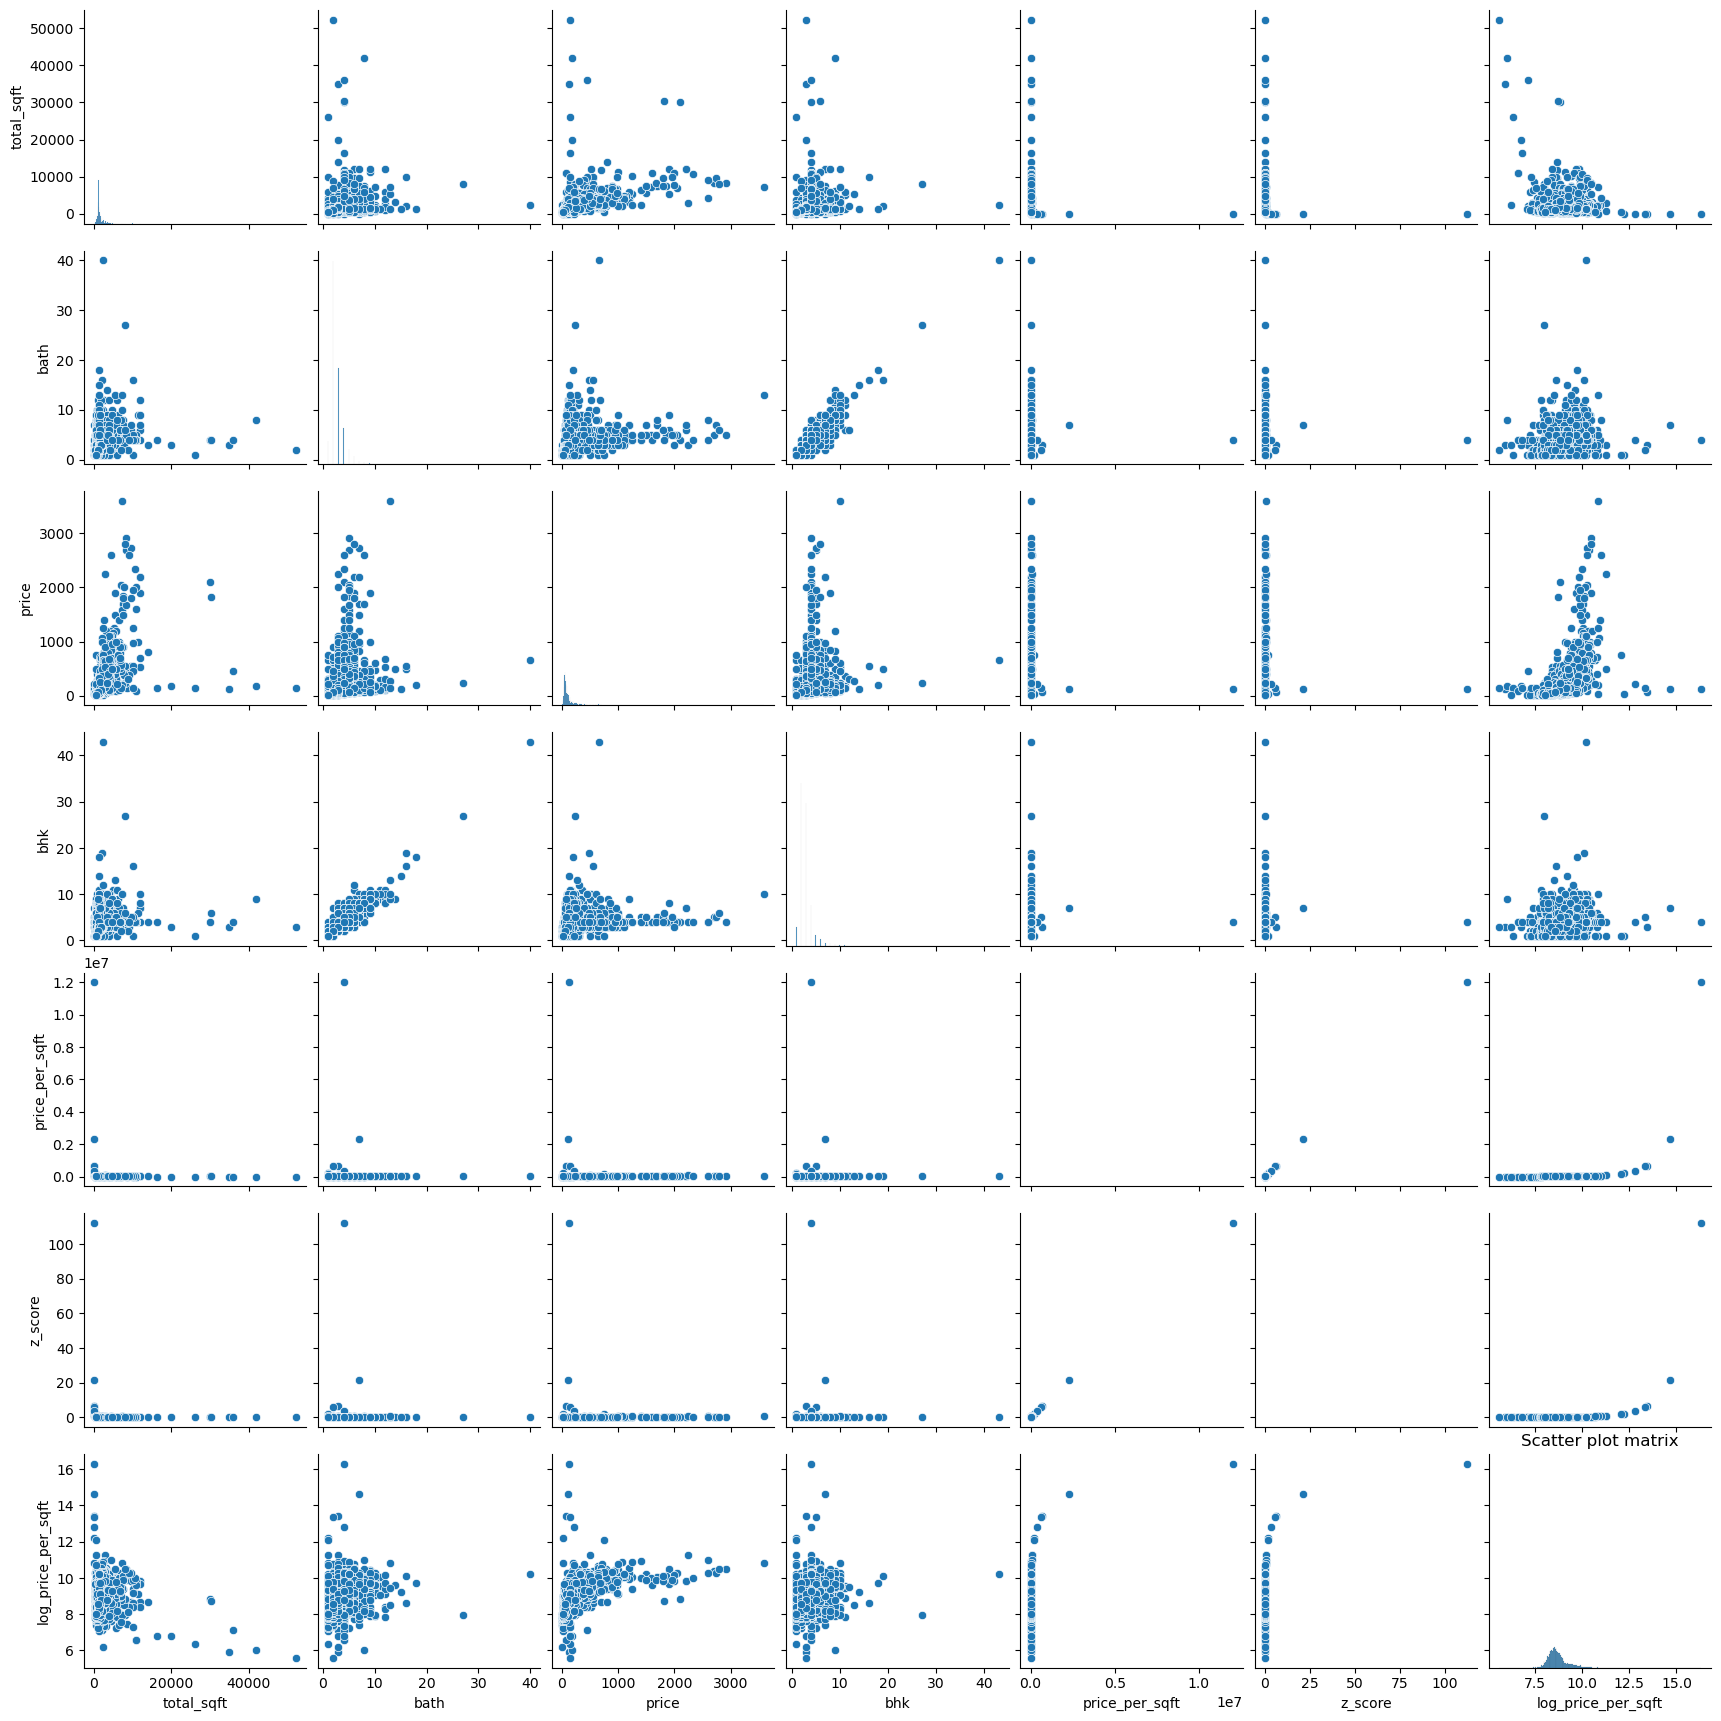

In [1]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Step 2: Load the dataset
# Make sure the path is correct, update 'house_price.csv' with the actual path if needed
df = pd.read_csv('house_price.csv')  # Or 'data/house_price.csv' if it's in the data folder

# Fixing inf values by replacing them with NaN explicitly
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Basic EDA (Q1)
print("First few rows of the dataset:")
print(df.head())

print("\nData information:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 3: Outlier Detection and Removal
# a) Mean and Standard Deviation Method (Q2a)
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()

# Identifying outliers (more than 2 standard deviations away from the mean)
outliers_mean_std = df[(df['price_per_sqft'] > mean + 2 * std_dev) | (df['price_per_sqft'] < mean - 2 * std_dev)]

# Remove outliers using the mean and std method
df_trimmed_mean_std = df[(df['price_per_sqft'] <= mean + 2 * std_dev) & (df['price_per_sqft'] >= mean - 2 * std_dev)]

# b) Percentile Method (Q2b)
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Identifying outliers outside 5th and 95th percentiles
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]

# Remove outliers using the percentile method
df_trimmed_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

# c) IQR (Inter-Quartile Range) Method (Q2c)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers outside 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_IQR = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Remove outliers using the IQR method
df_trimmed_IQR = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# d) Z-Score Method (Q2d)
df['z_score'] = zscore(df['price_per_sqft'])

# Identifying outliers with Z-score greater than 3 or less than -3
outliers_zscore = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# Remove outliers using the Z-score method
df_trimmed_zscore = df[(df['z_score'] <= 3) & (df['z_score'] >= -3)]

# Step 4: Box Plot to Compare Outlier Removal Methods (Q3)
# Create Box Plots for different methods of outlier removal
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for original data
sns.boxplot(ax=axs[0, 0], x=df['price_per_sqft']).set_title('Original Data')

# Boxplot for mean and std method
sns.boxplot(ax=axs[0, 1], x=df_trimmed_mean_std['price_per_sqft']).set_title('After Mean + Std')

# Boxplot for percentile method
sns.boxplot(ax=axs[1, 0], x=df_trimmed_percentile['price_per_sqft']).set_title('After Percentile')

# Boxplot for IQR method
sns.boxplot(ax=axs[1, 1], x=df_trimmed_IQR['price_per_sqft']).set_title('After IQR')

plt.tight_layout()
plt.show()

# Step 5: Histplot to Check Normality and Transformations (Q4)
# Histplot before transformation
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of price_per_sqft (Before Transformation)')
plt.show()

# Check skewness and kurtosis before transformation
print("Skewness before transformation:", df['price_per_sqft'].skew())
print("Kurtosis before transformation:", df['price_per_sqft'].kurt())

# Log Transformation (or square root if needed)
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

# Histplot after log transformation
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Histogram of log(price_per_sqft) (After Transformation)')
plt.show()

# Check skewness and kurtosis after transformation
print("Skewness after transformation:", df['log_price_per_sqft'].skew())
print("Kurtosis after transformation:", df['log_price_per_sqft'].kurt())

# Step 6: Correlation Between Numerical Columns and Heatmap (Q5)
# Select only numerical columns for correlation
df_numeric = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 7: Scatter Plot to Check Relationships Between Variables (Q6)
# Scatter plot matrix to check correlation between variables
sns.pairplot(df_numeric)
plt.title('Scatter plot matrix')
plt.show()
